# Лабораторная работа 12
Конечно-разностный метод решения одномерных параболических уравнений.


In [ ]:
import numpy as np
import pandas as pd

pd.options.display.float_format = '{:.5f}'.format

In [ ]:
def thomas_method(A, b):
    n = A.shape[0]
    x = np.zeros(n)
    alpha = np.zeros(n - 1)
    beta = np.zeros(n)

    alpha[0] = -A[0][1] / A[0][0]
    beta[0] = b[0] / A[0][0]
    for i in range(1, n - 1):
        y = A[i][i] + A[i][i - 1] * alpha[i - 1]
        alpha[i] = - A[i][i + 1] / y
        beta[i] = (b[i] - A[i][i - 1] * beta[i - 1]) / y
    beta[n - 1] = (b[n - 1] - A[n - 1][n - 2] * beta[n - 2]) / (A[n - 1][n - 1] + A[n - 1][n - 2] * alpha[n - 2])

    x[n - 1] = beta[n - 1]
    for i in range(n - 2, -1, -1):
        x[i] = alpha[i] * x[i + 1] + beta[i]

    return x

# Задание 1
Построение теста

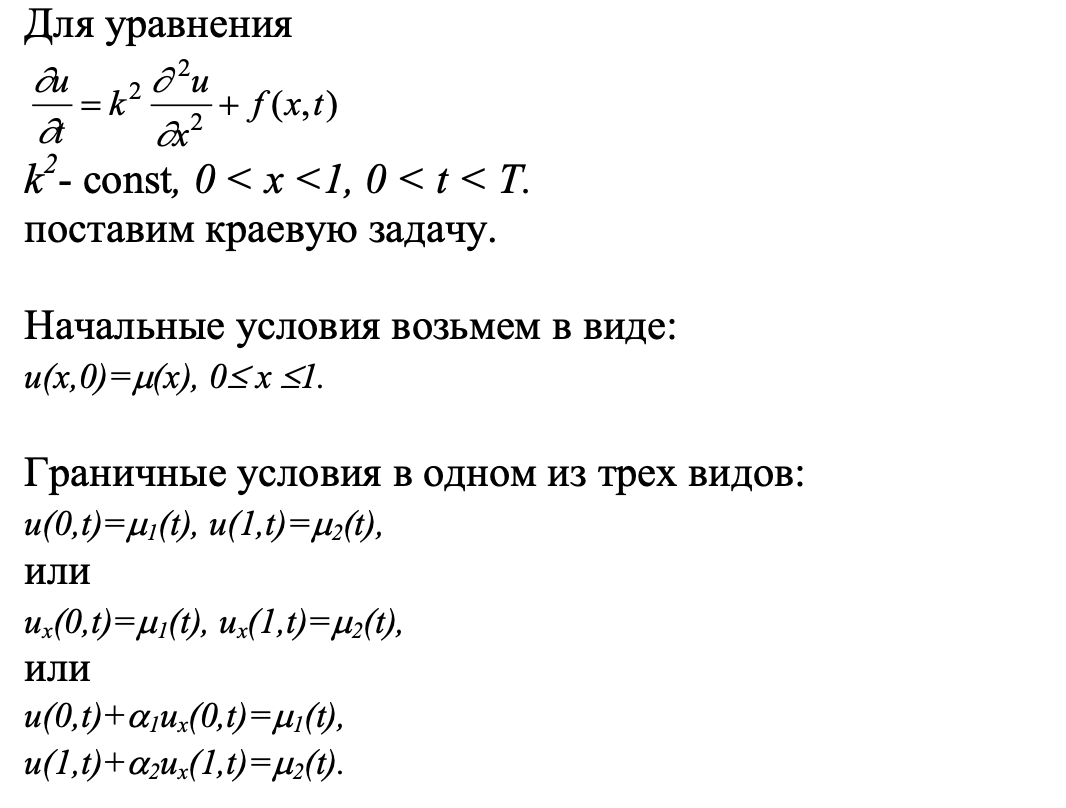

In [ ]:
def u(t, x):
    return (np.cos(np.pi * x) + 2) * (np.sin(t) + 2)

def u_t(t, x):
    return (np.cos(np.pi * x) + 2) * np.cos(t)

def u_x(t, x):
    return -np.pi * np.sin(np.pi * x) * (np.sin(t) + 2)

def u_xx(t, x):
    return -(np.pi**2) * np.cos(np.pi * x) * (np.sin(t) + 2)

def f(t, x):
    return u_t(t, x) - u_xx(t, x)

In [ ]:
# Начальные условия
def u0(x):
    return u(0, x)

In [ ]:
# Граничные условия 1 рода
def mu11(t):
    return u(t, 0)

def mu12(t):
    return u(t, 1)

# Граничные условия 2 рода
def mu21(t):
    return u_x(t, 0)

def mu22(t):
    return u_x(t, 1)

# Граничные условия 3 рода
def mu31(t, a):
    return u(t, 0) + a * u_x(t, 0)

def mu32(t, a):
    return u(t, 1) + a * u_x(t, 1)

# Задание 2
Расчеты по явной схеме


In [ ]:
def bv_explicit_1(mu, mu1, mu2, f, tau, h, T):
    t = np.arange(0, T + tau, tau)
    x = np.arange(0, 1 + h, h)
    u = np.zeros((len(t), len(x)))

    for i in range(len(x)):
        u[0, i] = mu(x[i])

    for n in range(len(t)-1):
        u[n+1, 0] = mu1(t[n+1])
        u[n+1, -1] = mu2(t[n+1])
        for i in range(1, len(x) - 1):
            u[n+1, i] = u[n, i] + tau*(f(t[n], x[i]) + (u[n, i+1] - 2*u[n, i] + u[n, i-1]) / (h ** 2))

    return t, x, u

In [ ]:
def bv_explicit_2(mu, mu1, mu2, f, tau, h, T):
    t = np.arange(0, T + tau, tau)
    x = np.arange(0, 1 + h, h)
    u = np.zeros((len(t), len(x)))

    for i in range(len(x)):
        u[0, i] = mu(x[i])

    for n in range(len(t)-1):
        for i in range(1, len(x) - 1):
            u[n+1, i] = u[n, i] + tau*(f(t[n], x[i]) + (u[n, i+1] - 2*u[n, i] + u[n, i-1]) / (h ** 2))
        u[n+1, 0] = u[n+1, 1] - h * mu1(t[n+1])
        u[n+1, -1] = u[n+1, -2] + h * mu2(t[n+1])

    return t, x, u

In [ ]:
def bv_explicit_3(mu, mu1, mu2, f, tau, h, T, a1, a2):
    t = np.arange(0, T + tau, tau)
    x = np.arange(0, 1 + h, h)
    u = np.zeros((len(t), len(x)))

    for i in range(len(x)):
        u[0, i] = mu(x[i])

    for n in range(len(t)-1):
        for i in range(1, len(x) - 1):
            u[n+1, i] = u[n, i] + tau*(f(t[n], x[i]) + (u[n, i+1] - 2*u[n, i] + u[n, i-1]) / (h ** 2))
        denom = h - a1
        num = h * mu1(t[n+1], a1) - a1 * u[n+1, 1]
        u[n+1, 0] = num / denom

        denom = h + a2
        num = h * mu2(t[n+1], a2) + a2 * u[n+1, -2]
        u[n+1, -1] = num / denom

    return t, x, u

In [ ]:
tau = 0.001
h = 0.05
T = 1
a1 = 2
a2 = 2

alpha = tau / h**2
t, x, res = bv_explicit_3(u0, mu31, mu32, f, tau, h, T, a1, a2)

print(f"Необх. спектр. признак уст. {'не' * int(alpha > 0.5)} выполняется: tau/h^2={alpha}")

ts = [n for n in range(10) for i in range(10)]
xs = [i for n in range(10) for i in range(10)]
flat_grid = [(round(t[n], 5), round(x[i], 5)) for n in range(10) for i in range(10)]
exact = [u(t[n], x[i]) for n in range(10) for i in range(10)]
numerical = [res[n, i] for n in range(10) for i in range(10)]
abs_err = [abs(exact[i] - numerical[i]) for i in range(len(exact))]
rel_err = [100 * abs_err[i] / exact[i] for i in range(len(exact))]

df = pd.DataFrame({
    "n": ts,
    "i": xs,
    "(t[n], x[i])": flat_grid,
    "u(t[n], x[i])": exact,
    "y_ni": numerical,
    "abs_err": abs_err,
    "rel_err": rel_err
})

df.tail(40)

Необх. спектр. признак уст.  выполняется: tau/h^2=0.3999999999999999


,n,i,"(t[n], x[i])","u(t[n], x[i])",y_ni,abs_err,rel_err
60,6,0,"(0.006, 0.0)",6.01800,5.96166,0.05634,0.93621
61,6,1,"(0.006, 0.05)",5.99330,5.96307,0.03024,0.50449
62,6,2,"(0.006, 0.1)",5.91982,5.90608,0.01374,0.23209
63,6,3,"(0.006, 0.15)",5.79936,5.79435,0.00501,0.08636
64,6,4,"(0.006, 0.2)",5.63489,5.63365,0.00124,0.02196
65,6,5,"(0.006, 0.25)",5.43046,5.43037,0.00009,0.00167
66,6,6,"(0.006, 0.3)",5.19110,5.19124,0.00014,0.00269
67,6,7,"(0.006, 0.35)",4.92270,4.92281,0.00011,0.00219
68,6,8,"(0.006, 0.4)",4.63189,4.63196,0.00007,0.00159
69,6,9,"(0.006, 0.45)",4.32581,4.32584,0.00004,0.00086


In [ ]:
tau = 0.01
h = 0.01
T = 1
a1 = 1
a2= 1

alpha = tau / h**2
t, x, res = bv_explicit_3(u0, mu31, mu32, f, tau, h, T, a1, a2)

print(f"Необх. спектр. признак уст. {'не' * int(alpha > 0.5)} выполняется: tau/h^2={alpha}")

ts = [n for n in range(10) for i in range(10)]
xs = [i for n in range(10) for i in range(10)]
flat_grid = [(round(t[n], 5), round(x[i], 5)) for n in range(10) for i in range(10)]
exact = [u(t[n], x[i]) for n in range(10) for i in range(10)]
numerical = [res[n, i] for n in range(10) for i in range(10)]
abs_err = [abs(exact[i] - numerical[i]) for i in range(len(exact))]
rel_err = [100 * abs_err[i] / exact[i] for i in range(len(exact))]

df = pd.DataFrame({
    "n": ts,
    "i": xs,
    "(t[n], x[i])": flat_grid,
    "u(t[n], x[i])": exact,
    "y_ni": numerical,
    "abs_err": abs_err,
    "rel_err": rel_err
})

df.tail(50)

Необх. спектр. признак уст. не выполняется: tau/h^2=100.0


,n,i,"(t[n], x[i])","u(t[n], x[i])",y_ni,abs_err,rel_err
50,5,0,"(0.05, 0.0)",-0.85309,-209562.53052,209561.67743,-24564946.37920
51,5,1,"(0.05, 0.01)",-0.91122,-207466.97231,207466.06108,-22767885.90954
52,5,2,"(0.05, 0.02)",-0.96845,376528.92479,376529.89325,-38879519.47925
53,5,3,"(0.05, 0.03)",-1.02473,-210820.73705,210819.71232,-20573235.71669
54,5,4,"(0.05, 0.04)",-1.07999,42589.95749,42591.03748,-3943644.82650
55,5,5,"(0.05, 0.05)",-1.13419,-1.13475,0.00056,-0.04978
56,5,6,"(0.05, 0.06)",-1.18727,-1.18752,0.00026,-0.02157
57,5,7,"(0.05, 0.07)",-1.23918,-1.23859,0.00058,-0.04705
58,5,8,"(0.05, 0.08)",-1.28986,-1.29048,0.00062,-0.04801
59,5,9,"(0.05, 0.09)",-1.33927,-1.33920,0.00007,-0.00551


# Задание 3
Расчеты по неявной схеме


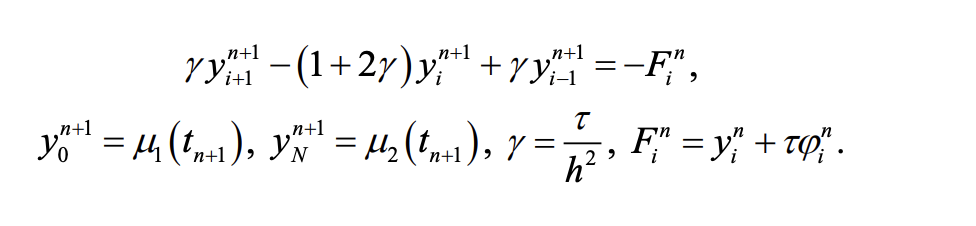

In [ ]:
def bv_implicit_1(mu, mu1, mu2, f, tau, h, T):
    t = np.arange(0, T + tau, tau)
    x = np.arange(0, 1 + h, h)
    N = len(x)
    K = len(t)
    u = np.zeros((K, N))

    # Начальное условие
    for i in range(N):
        u[0, i] = mu(x[i])

    gamma = tau / (h**2)

    for n in range(K-1):
        A = np.zeros((N, N))
        b = np.zeros(N)
        for i in range(1, N-1):
            A[i, i-1] = gamma
            A[i, i] = -(1 + 2 * gamma)
            A[i, i+1] = gamma
            b[i] = -(tau*f(t[n+1], x[i]) + u[n, i])
        A[0, 0] = 1
        A[-1, -1] = 1
        b[0] = mu1(t[n+1])
        b[-1] = mu2(t[n+1])

        u[n+1, :] = thomas_method(A, b)

    return t, x, u

In [ ]:
tau = 0.001
h = 0.001
T = 1

t, x, res = bv_implicit_1(u0, mu11, mu12, f, tau, h, T)

flat_grid = [(round(t[i], 5), round(x[i], 5)) for i in range(1000)]
exact = [u(t[i], x[i]) for i in range(1000)]
numerical = [res[i, i] for i in range(1000)]
abs_err = [abs(exact[i] - numerical[i]) for i in range(len(exact))]
rel_err = [100 * abs_err[i] / exact[i] for i in range(len(exact))]

df = pd.DataFrame({
    "(t[n], x[i])": flat_grid,
    "u(t[n], x[i])": exact,
    "y_ni": numerical,
    "abs_err": abs_err,
    "rel_err": rel_err
})

df.tail(50)

,"(t[n], x[i])","u(t[n], x[i])",y_ni,abs_err,rel_err
950,"(0.95, 0.95)",0.75618,0.75619,0.00000,0.00048
951,"(0.951, 0.951)",0.76485,0.76486,0.00000,0.00047
952,"(0.952, 0.952)",0.77351,0.77352,0.00000,0.00045
953,"(0.953, 0.953)",0.78217,0.78218,0.00000,0.00044
954,"(0.954, 0.954)",0.79083,0.79083,0.00000,0.00043
955,"(0.955, 0.955)",0.79948,0.79948,0.00000,0.00041
956,"(0.956, 0.956)",0.80812,0.80813,0.00000,0.00040
957,"(0.957, 0.957)",0.81676,0.81677,0.00000,0.00039
958,"(0.958, 0.958)",0.82540,0.82540,0.00000,0.00037
959,"(0.959, 0.959)",0.83403,0.83403,0.00000,0.00036


In [ ]:
def bv_implicit_2(mu, mu1, mu2, f, tau, h, T):
    t = np.arange(0, T + tau, tau)
    x = np.arange(0, 1 + h, h)
    K, N = len(t), len(x)
    u = np.zeros((K, N))
    for i in range(N):
        u[0, i] = mu(x[i])

    gamma = tau / h**2

    for n in range(K-1):
        A = np.zeros((N, N))
        b = np.zeros(N)
        for i in range(1, N-1):
            A[i, i-1] = gamma
            A[i, i] = -(1 + 2*gamma)
            A[i, i+1] = gamma
            b[i] = -(u[n, i] + tau * f(t[n+1], x[i]))
        A[0, 0] = -1
        A[0, 1] =  1
        b[0] =  h * mu1(t[n+1])
        A[-1, -2] = -1
        A[-1, -1] = 1
        b[-1] = h * mu2(t[n+1])

        u[n+1, :] = thomas_method(A, b)

    return t, x, u

In [ ]:
tau = 0.001
h = 0.001
T = 1

t, x, res = bv_implicit_2(u0, mu21, mu22, f, tau, h, T)

flat_grid = [(round(t[i], 5), round(x[i], 5)) for i in range(1000)]
exact = [u(t[i], x[i]) for i in range(1000)]
numerical = [res[i, i] for i in range(1000)]
abs_err = [abs(exact[i] - numerical[i]) for i in range(len(exact))]
rel_err = [100 * abs_err[i] / exact[i] for i in range(len(exact))]

df = pd.DataFrame({
    "(t[n], x[i])": flat_grid,
    "u(t[n], x[i])": exact,
    "y_ni": numerical,
    "abs_err": abs_err,
    "rel_err": rel_err
})

df.tail(50)

,"(t[n], x[i])","u(t[n], x[i])",y_ni,abs_err,rel_err
950,"(0.95, 0.95)",0.75618,0.75375,0.00243,0.32123
951,"(0.951, 0.951)",0.76485,0.76242,0.00244,0.31839
952,"(0.952, 0.952)",0.77351,0.77107,0.00244,0.31562
953,"(0.953, 0.953)",0.78217,0.77973,0.00245,0.31291
954,"(0.954, 0.954)",0.79083,0.78837,0.00245,0.31026
955,"(0.955, 0.955)",0.79948,0.79702,0.00246,0.30767
956,"(0.956, 0.956)",0.80812,0.80566,0.00247,0.30513
957,"(0.957, 0.957)",0.81676,0.81429,0.00247,0.30266
958,"(0.958, 0.958)",0.82540,0.82292,0.00248,0.30023
959,"(0.959, 0.959)",0.83403,0.83155,0.00248,0.29786


In [ ]:
def bv_implicit_3(mu, mu1, mu2, f, tau, h, T, a1, a2):
    t = np.arange(0, T+tau, tau)
    x = np.arange(0, 1+h,  h)
    K, N = len(t), len(x)
    u = np.zeros((K, N))

    for i in range(N):
        u[0, i] = mu(x[i])

    gamma = tau / h**2

    for n in range(K-1):
        A = np.zeros((N, N))
        b = np.zeros(N)

        A[0, 0] = 1 - a1/h
        A[0, 1] = a1/h
        b[0] = mu1(t[n+1], a1)

        for i in range(1, N-1):
            A[i, i-1] = gamma
            A[i, i] = -(1 + 2*gamma)
            A[i, i+1] = gamma
            b[i] = -(u[n, i] + tau * f(t[n+1], x[i]))

        A[-1, -1] = 1 + a2/h
        A[-1, -2] = -a2/h
        b[-1] = mu2(t[n+1], a2)

        u[n+1, :] = thomas_method(A, b)

    return t, x, u


In [ ]:
tau = 0.001
h = 0.001
T = 1
a1 = 1
a2= 1

t, x, res = bv_implicit_3(u0, mu31, mu32, f, tau, h, T, a1, a2)

ts = [n for n in range(10) for i in range(10)]
xs = [i for n in range(10) for i in range(10)]
flat_grid = [(round(t[n], 5), round(x[i], 5)) for n in range(10) for i in range(10)]
exact = [u(t[n], x[i]) for n in range(10) for i in range(10)]
numerical = [res[n, i] for n in range(10) for i in range(10)]
abs_err = [abs(exact[i] - numerical[i]) for i in range(len(exact))]
rel_err = [100 * abs_err[i] / exact[i] for i in range(len(exact))]

df = pd.DataFrame({
    "n": ts,
    "i": xs,
    "(t[n], x[i])": flat_grid,
    "u(t[n], x[i])": exact,
    "y_ni": numerical,
    "abs_err": abs_err,
    "rel_err": rel_err
})

df.tail(50)

,n,i,"(t[n], x[i])","u(t[n], x[i])",y_ni,abs_err,rel_err
50,5,0,"(0.005, 0.0)",-0.83437,-0.83403,0.00035,-0.04137
51,5,1,"(0.005, 0.001)",-0.84010,-0.83976,0.00034,-0.04056
52,5,2,"(0.005, 0.002)",-0.84581,-0.84548,0.00034,-0.03976
53,5,3,"(0.005, 0.003)",-0.85152,-0.85119,0.00033,-0.03898
54,5,4,"(0.005, 0.004)",-0.85722,-0.85689,0.00033,-0.03821
55,5,5,"(0.005, 0.005)",-0.86291,-0.86258,0.00032,-0.03746
56,5,6,"(0.005, 0.006)",-0.86859,-0.86827,0.00032,-0.03672
57,5,7,"(0.005, 0.007)",-0.87426,-0.87395,0.00031,-0.03600
58,5,8,"(0.005, 0.008)",-0.87993,-0.87962,0.00031,-0.03529
59,5,9,"(0.005, 0.009)",-0.88558,-0.88528,0.00031,-0.03460


In [ ]:
tau = 0.001
h = 0.001
T = 1
a1 = 1
a2 = 1

t, x, res = bv_implicit_3(u0, mu31, mu32, f, tau, h, T, a1, a2)

flat_grid = [(round(t[i], 5), round(x[i], 5)) for i in range(1000)]
exact = [u(t[i], x[i]) for i in range(1000)]
numerical = [res[i, i] for i in range(1000)]
abs_err = [abs(exact[i] - numerical[i]) for i in range(len(exact))]
rel_err = [100 * abs_err[i] / exact[i] for i in range(len(exact))]

df = pd.DataFrame({
    "(t[n], x[i])": flat_grid,
    "u(t[n], x[i])": exact,
    "y_ni": numerical,
    "abs_err": abs_err,
    "rel_err": rel_err
})

df.tail(50)

,"(t[n], x[i])","u(t[n], x[i])",y_ni,abs_err,rel_err
950,"(0.95, 0.95)",0.75618,0.75823,0.00204,0.27029
951,"(0.951, 0.951)",0.76485,0.76690,0.00204,0.26717
952,"(0.952, 0.952)",0.77351,0.77556,0.00204,0.26412
953,"(0.953, 0.953)",0.78217,0.78422,0.00204,0.26114
954,"(0.954, 0.954)",0.79083,0.79287,0.00204,0.25823
955,"(0.955, 0.955)",0.79948,0.80152,0.00204,0.25538
956,"(0.956, 0.956)",0.80812,0.81017,0.00204,0.25260
957,"(0.957, 0.957)",0.81676,0.81881,0.00204,0.24987
958,"(0.958, 0.958)",0.82540,0.82744,0.00204,0.24721
959,"(0.959, 0.959)",0.83403,0.83607,0.00204,0.24460


# Исследование схемы "крест" Ричардсона  
[Лист 1](https://drive.google.com/file/d/13CHjLq-i6xWZJVIRaBrjpFoDBl2HeQE9/view?usp=sharing) [Лист 2](https://drive.google.com/file/d/1136PL6EnS6_weCCzpW0VC4a8mTth3OO7/view?usp=sharing)